In [1]:
import pandas as pd

In [2]:
pd.read_table("flowers.data", sep=',', names=["sepal len", " sepal wid", "petal len", "petal wid", "class"])

,sepal len,sepal wid,petal len,petal wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
data=pd.read_table("flowers.data", sep=',', names=["sepal len", " sepal wid", "petal len", "petal wid", "class"])

In [4]:
data.head()

,sepal len,sepal wid,petal len,petal wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.naive_bayes import GaussianNB

In [8]:
import numpy as np

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

In [14]:
gnb = GaussianNB()

In [16]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 4].values

In [18]:
gnb.fit(X, y)

GaussianNB(priors=None)

In [19]:
y_train.shape

(120,)

In [20]:
X_test.shape

(30, 4)

In [33]:
y_pred = gnb.predict(X_test)

In [26]:
print(y_pred)

['Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor']


In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [27]:
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.97
Accuracy of GNB classifier on test set: 0.97


In [28]:
import matplotlib.pyplot as plt

In [36]:
cm = confusion_matrix(y_test, y_pred)

In [37]:
print (cm)

[[ 8  0  0]
 [ 0 10  0]
 [ 0  1 11]]


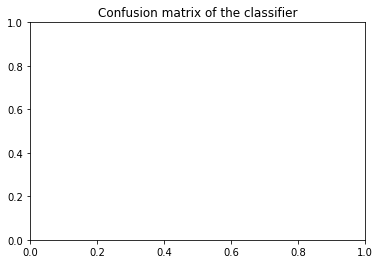

In [40]:
fig = plt.figure()
plt.title('Confusion matrix of the classifier')
plt.show()

In [41]:
y_test.shape

(30,)

In [ ]:
Question 2
The accuracy of the trained model is 97%.
Other metrics that can be used:
    Classification Accuracy
    Logarithmic Loss
    Area under the curve
    Root Mean Squared Error

Question 4
The probability of a particular feature is independent of the probability of anothr feature occuring given a class variable.

Question 5
Gaussian: It is useful when predictors take up continuous values and not discrete values.
          It is assumed that the values follow a normal distribution as well as the values of all other features.
Multinomial: It is useful when the predictors take on a range of discrete values
Binomial: It is similar to multinomial but instead of a range of discrete values, the predictors have binary values i.e only 2 distinct groups.

